In [26]:
!python --version

Python 3.6.1 :: Anaconda 4.4.0 (x86_64)


In [2]:
x = 3
print(type(x))

<class 'int'>


In [3]:
print(x)

3


In [6]:
print(x**2+1)

10


In [10]:
t = True
f = False
print(t)

True


In [11]:
hello = 'hello'

In [13]:
print(len(hello))

5


In [18]:
hello.rjust(8)

'   hello'

In [25]:
hello.center(8)

' hello  '

In [27]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

cat
dog
monkey


In [32]:
%timeit

animals = ['cat', 'dog', 'monkey']

x = enumerate(animals)
x

for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))

#1: cat
#2: dog
#3: monkey


In [33]:
?enumerate

## NumPy Basics: Arrays and Vectorized Computation

In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data1 = [1,2,3,4,5]

In [3]:
print(data1)   # print the list

[1, 2, 3, 4, 5]


In [5]:
arr1 = np.array(data1)

In [8]:
print(arr1)

[1 2 3 4 5]


In [9]:
arr1.dtype

dtype('int64')

In [7]:
print(data1)

[1, 2, 3, 4, 5]


However, calling `data1.dtype` will return an error, as the `dtype` function is not applicable on a list.

Nested sequences will be converted into a multidimensional array:

In [10]:
data2 = [[1,2,3,4],[5,6,7,8]]

In [11]:
print(data2)

[[1, 2, 3, 4], [5, 6, 7, 8]]


In [13]:
arr2 = np.array(data2)

In [14]:
print(arr2)

[[1 2 3 4]
 [5 6 7 8]]


Check out the dimension:

In [15]:
arr2.ndim

2

In [16]:
arr2.shape

(2, 4)

In [17]:
arr2.dtype

dtype('int64')

### Mathematical and statistical functions

In [16]:
x = np.arange(12).reshape(3, 4)

In [17]:
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [19]:
x.T   # transpose

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [22]:
np.sum(x, axis = 1)   # for each row, sum over all column data elements within that row

array([ 6, 22, 38])

In [23]:
np.prod(x, axis = 0)  # for each column, multiply over all row data elements within that column

array([  0,  45, 120, 231])

In [24]:
np.sum(x)

66

In [26]:
np.dot(x, x.T)

array([[ 14,  38,  62],
       [ 38, 126, 214],
       [ 62, 214, 366]])

In [30]:
print(np.argmax(x))   # index for overall max
print(np.argmax(x, axis = 0))   # index for max within each column (over all rows)

11
[2 2 2 2]


In [31]:
np.where(x <= 5, 0, x)

array([[ 0,  0,  0,  0],
       [ 0,  0,  6,  7],
       [ 8,  9, 10, 11]])

### Example: simulating random walks

In [32]:
?np.random.randint  # randint(low, high, size) return random integers from 'low' (inclusive) to 'high' (exclusive)

In [34]:
nwalks = 5000
nsteps = 1000

draws = np.random.randint(0, 2, size = (nwalks, nsteps))

In [43]:
steps = np.where(draws > 0, 1, -1)
# steps = 2*draws - 1

In [44]:
walks = steps.cumsum(1)
# walks = np.cumsum(steps, 1)

In [45]:
print(walks)

[[   1    0    1 ...,  -60  -61  -60]
 [   1    2    1 ...,  -44  -43  -44]
 [  -1   -2   -3 ...,  -98  -99 -100]
 ..., 
 [   1    0    1 ...,   -8   -9  -10]
 [   1    0    1 ...,   -6   -7   -6]
 [  -1   -2   -3 ...,   74   75   76]]


Summarize the statistics over all these walks:

In [46]:
walks.max()

125

In [47]:
walks.min()

-126

Compute the minimum crossing time to 30 or -30:

In [ ]:
test = (np.abs(walks) >= 30)

In [53]:
idx = (np.abs(walks) >= 30).any(1)   # use 'any' function to identify which walk has reached 
                                     # a distance of 30 and above from the origin

In [54]:
print(idx)

[ True  True  True ..., False False  True]


In [69]:
np.sum(idx)   # number of walks that hit -30 or 30

3428

In [50]:
?any

In [78]:
walks30more = (np.abs(walks) >= 30)[idx,]   # only keep walks reached -30 or 30
print(walks30more)

[[False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 ..., 
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]]


In [81]:
walks30more.argmax(1).mean()     # argmax only returns the FIRST index of the maximum

494.38506417736289

In [66]:
# t = np.array([False, True, True, False, True, False, False, True])
# t1 = np.array([1, 2, 2, 1, 0])

In [67]:
# t.argmax()
# t1.argmax()

2

My way to do it:

In [82]:
hit30 = (np.abs(walks) == 30).argmax(1)

In [85]:
hit30[hit30>0].mean()    # bad programming though - the hit30>0 trick is not transferrable to other logics

494.38506417736289

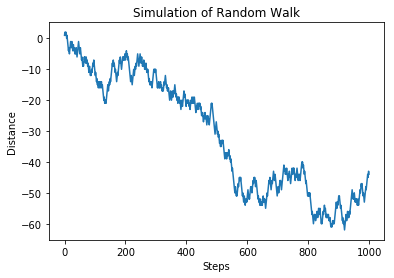

In [100]:
plt.plot(walks[1])
plt.ylabel('Distance')
plt.xlabel('Steps')
plt.title('Simulation of Random Walk')
plt.show()

In [93]:
walks[1].shape

(1000,)

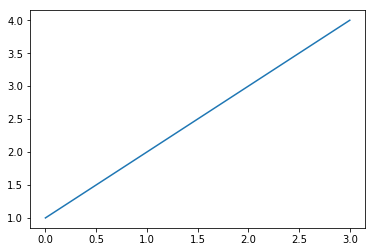

In [101]:
plt.plot([1,2,3,4])
plt.show()

In [107]:
a = range(0, 129, 64)

In [109]:
len(a)

3

In [110]:
print(*a)

0 64 128


In [117]:
print(*zip(range(0, 640, 128), range(128, 640+1, 128)))

(0, 128) (128, 256) (256, 384) (384, 512) (512, 640)


In [128]:
np.arange(12).reshape(-1, 2, 2)

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]]])

In [123]:
print(*b)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128


In [120]:
np.reshape(b, [-1, 2, 2])

ValueError: cannot reshape array of size 129 into shape (2,2)